In [29]:
#EGE BİRCAN
#20950


#

#Give basic information regarding the dataset such as shape, data types and descriptive statistics that
#summarize columns.

#Our data basically consists 118186 rows and 11 columns in it.

#There are briefly 2 data types that are used in our data. Strings and integers.But we can also add date/time data type 
#because it differs from other data types (for example: id, vendor_id ). 

#In the columns we have id for the identifier of a specific trip which is a mixture of strings and integers.
#vendor_id is the identifier code of the provider of that specific trip which is a number that is only 1 or 2.
#pickup_datetime is the date and time of when the trip is begun. It consists of year-month-day hour:minute:second
#dropoff_datetime is the date and time of when the trip is ended. It consists of year-month-day hour:minute:second
#passenger=count indicates the number of passengers in the vehicle
#pickup_longitude shows the longitude where the meter was engaged
#pickup_latitude shows the latitude where the meter was engaged
#dropoff_longitude shows the longitude where the meter was disengaged
#dropoff_latitude shows the latitude where the meter was disengaged
#dropoff_store_and_fwd_flag indicates whether the trip record was held in vehicle memory
#trip_duration indicates the duration of the trip in seconds

#





In [26]:
#Create two new columns named ”pickup district” and ”dropoff district” 
#by applying reverse geocoding 1 2 to associated coordinates    

#Extract the top 5 districts where passengers prefer to leave and arrive


import numpy as np
import json  
import reverse_geocoder as rg
import csv
import pandas as pd
    
csv_input = pd.read_csv('taxi-trips.csv')

#Create two new columns named ”pickup district” and ”dropoff district” 
#by applying reverse geocoding 1 2 to associated coordinates     

csv_input['pickup_district'] = "0"
csv_input['dropoff_district'] = "1"

#csv_input.to_csv('C:/Users/EB/Desktop/output2.csv', index=False)
            
num_lines = sum(1 for line in open('taxi-trips.csv'))


#Extract the top 5 districts where passengers prefer to leave

for x in range (0, num_lines):
    a = csv_input.iloc[x,5] #long
    b = csv_input.iloc[x,6] #lat
    coord = (b,a)
    geocode = rg.search(coord)
    s1 = json.dumps(geocode[0]) #extract the name from geocode list
    d2 = json.loads(s1)
    csv_input.iloc[x,11] = d2.get('name')
    #print(d2.get('name'))
     
    #csv_input.to_csv('C:/Users/EB/Desktop/output2.csv', index=False)
     
    
array = []


for x in range (0, num_lines):
    a = csv_input.iloc[x,11] #adress
    array.append(a)


freq = [[x,array.count(x)] for x in set(array)]

freq.sort(key=lambda x: x[1], reverse = True)


print("Top 5 districts where passengers prefer to leave:\n")

print(freq[0][0] + "\n" + freq[1][0] + "\n" + freq[2][0] + "\n" + freq[3][0] + "\n" + freq[4][0] + "\n")





#Extract the top 5 districts where passengers prefer to arrive

for x in range (0, num_lines):
    a = csv_input.iloc[x,7] #long
    b = csv_input.iloc[x,8] #lat
    coord = (b,a)
    geocode = rg.search(coord)
    s1 = json.dumps(geocode[0]) #extract the name from geocode list
    d2 = json.loads(s1)
    csv_input.iloc[x,12] = d2.get('name')
    #print(d2.get('name'))
     
    #csv_input.to_csv('C:/Users/EB/Desktop/output2.csv', index=False) 
    
array2 = []


for x in range (0, num_lines):
    a = csv_input.iloc[x,12] #adress
    array2.append(a)


freq2 = [[x,array2.count(x)] for x in set(array2)]

freq2.sort(key=lambda x: x[1], reverse = True)


print("Top 5 districts where passengers prefer to arrive:\n")
 
print(freq2[0][0] + "\n" + freq2[1][0] + "\n" + freq2[2][0] + "\n" + freq2[3][0] + "\n" + freq2[4][0] + "\n")




#csv_input = pd.read_csv('C:/Users/EB/Desktop/output2.csv')
            
              
    

Top 5 districts where passengers prefer to leave

Manhattan
New York City
Long Island City
Weehawken
Hoboken

Top 5 districts where passengers prefer to leave

Manhattan
New York City
East New York
Long Island City
Weehawken



In [3]:
from geopy.distance import geodesic
import csv
import pandas as pd

#Create a new column named ”distance” by utilizing pick up and drop off coordinates

csv_input = pd.read_csv('taxi-trips.csv')
            
csv_input['distance'] = "0"

num_lines = sum(1 for line in open('taxi-trips.csv'))

for x in range (0, num_lines):

    a = csv_input.iloc[x,5] #long
    b = csv_input.iloc[x,6] #lat
    coord = (a,b)

    c = csv_input.iloc[x,7] #long
    d = csv_input.iloc[x,8] #lat
    coord2 = (c,d)

    csv_input.iloc[x,11] = geodesic(coord, coord2).miles
    
#csv_input.to_csv('C:/Users/EB/Desktop/output2.csv', index=False)



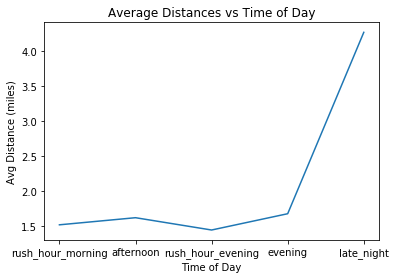

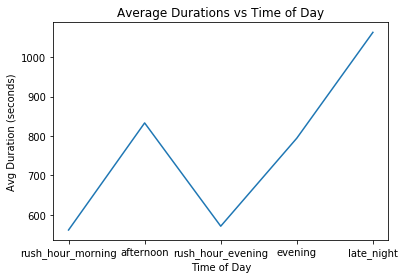

In [25]:
#Create a new column named ”time of day” by aggregating timestamps in ”pickup datetime” into
#5 different categories.

#Show how the average distance varies as time of the day changes.

#Show how the trip duration varies as time of the day changes.


from datetime import datetime
import matplotlib.pylab as plt
from geopy.distance import geodesic
import reverse_geocoder as rg
import csv
import pandas as pd

csv_input = pd.read_csv('taxi-trips.csv')

num_lines = sum(1 for line in open('taxi-trips.csv'))

distances = [0, 0, 0, 0, 0]

csv_input['distance'] = "0"

for x in range (0, num_lines):

    a = csv_input.iloc[x,5] #long
    b = csv_input.iloc[x,6] #lat
    coord = (b,a)

    c = csv_input.iloc[x,7] #long
    d = csv_input.iloc[x,8] #lat
    coord2 = (d,c)

    csv_input.iloc[x,11] = geodesic(coord, coord2).miles

    

csv_input['time_of_day'] = "0"

timeOfDay = ['rush_hour_morning', 'afternoon', 'rush_hour_evening', 'evening', 'late_night']

t = datetime.strptime('2016-03-14 00:00:00', '%Y-%m-%d %H:%M:%S').time() #this variable references transition to new day

#rush hour morning
t1 = datetime.strptime('2016-03-14 07:00:00', '%Y-%m-%d %H:%M:%S').time()
t2 = datetime.strptime('2016-03-14 09:00:00', '%Y-%m-%d %H:%M:%S').time()

#afternoon
t3 = datetime.strptime('2016-03-14 09:00:00', '%Y-%m-%d %H:%M:%S').time()
t4 = datetime.strptime('2016-03-14 16:00:00', '%Y-%m-%d %H:%M:%S').time()

#rush hour evening
t5 = datetime.strptime('2016-03-14 16:00:00', '%Y-%m-%d %H:%M:%S').time()
t6 = datetime.strptime('2016-03-14 18:00:00', '%Y-%m-%d %H:%M:%S').time()

#evening
t7 = datetime.strptime('2016-03-14 18:00:00', '%Y-%m-%d %H:%M:%S').time()
t8 = datetime.strptime('2016-03-14 23:00:00', '%Y-%m-%d %H:%M:%S').time()

#late night
t9 = datetime.strptime('2016-03-14 23:00:00', '%Y-%m-%d %H:%M:%S').time()
t10 = datetime.strptime('2016-03-14 07:00:00', '%Y-%m-%d %H:%M:%S').time()


durations = [0, 0, 0, 0, 0]


counter1 = 0
counter2 = 0
counter3 = 0
counter4 = 0
counter5 = 0

for x in range (0, num_lines):
    times = datetime.strptime(csv_input.iloc[x,2], '%Y-%m-%d %H:%M:%S').time()
    distcsv = csv_input.iloc[x,11]
    durcsv = csv_input.iloc[x,10]
    
    if times >= t1 and times < t2:
        csv_input.iloc[x,12] = 'rush_hour_morning'
        distances[0] += distcsv
        durations[0] += durcsv
        counter1 += 1
        
    elif times >= t3 and times < t4:
        csv_input.iloc[x,12] = 'afternoon'
        distances[1] += distcsv
        durations[1] += durcsv
        counter2 += 1
        
    elif times >= t5 and times < t6:
        csv_input.iloc[x,12] = 'rush_hour_evening'
        distances[2] += distcsv
        durations[2] += durcsv
        counter3 += 1
        
    elif times >= t7 and times < t8: 
        csv_input.iloc[x,12] = 'evening'
        distances[3] += distcsv
        durations[3] += durcsv
        counter4 += 1
        
    elif (times >= t9 and times < t) or (times >= t and times < t10) : 
        csv_input.iloc[x,12] = 'late_night'
        distances[4] += distcsv
        durations[4] += durcsv
        counter5 += 1
        

avgdist = [distances[0]/counter1, distances[1]/counter2, distances[2]/counter3, distances[3]/counter4, distances[4]/counter5]
avgdur = [durations[0]/counter1, durations[1]/counter2, durations[2]/counter3, durations[3]/counter4, durations[4]/counter5] 

plt.plot(timeOfDay, avgdist)  

plt.title('Average Distances vs Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Avg Distance (miles)')

plt.show();  



plt.plot(timeOfDay, avgdur)

plt.title('Average Durations vs Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Avg Duration (seconds)')

plt.show(); 



#csv_input.to_csv('C:/Users/EB/Desktop/output2.csv', index=False)



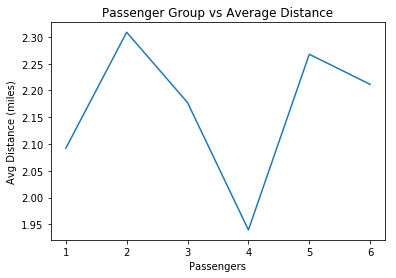

In [33]:
#Does passenger group size affect the distance?

#It does. As seen in the plot when the passanger group consists of 2 passengers 
#the average distance is the longest. But that doesn't mean there is a correlation.
#When there are 3 passengers, the average distance is less than when there are 2 passengers.
#Also when there are 5 passengers, average distance incrases again.

#So, yes group size affects the distance but not proportionally to the group size.

import matplotlib.pylab as plt
from geopy.distance import geodesic
import reverse_geocoder as rg
import csv
import pandas as pd

csv_input = pd.read_csv('taxi-trips.csv')

num_lines = sum(1 for line in open('taxi-trips.csv'))

           
csv_input['distance'] = "0"

for x in range (0, num_lines):

    a = csv_input.iloc[x,5] #long
    b = csv_input.iloc[x,6] #lat
    coord = (b,a)

    c = csv_input.iloc[x,7] #long
    d = csv_input.iloc[x,8] #lat
    coord2 = (d,c)

    csv_input.iloc[x,11] = geodesic(coord, coord2).miles
    

dict = {}
counter = {}

for x in range (0, num_lines): 

    key   = csv_input.iloc[x,4]
    value = csv_input.iloc[x,11]
    
    
    if  key in dict:
        dict[key] = dict[key] + value
        counter[key] += 1
    else:
        dict[key] = value
        counter[key] = 1


avgarray = [] 

for theKey in dict.keys():

    avg = dict[theKey] / counter[theKey]
    avgarray.append(avg)


plt.plot(sorted(list(dict.keys())),avgarray)

plt.title('Passenger Group vs Average Distance')
plt.xlabel('Passengers')
plt.ylabel('Avg Distance (miles)')

plt.show()        

#csv_input.to_csv('C:/Users/EB/Desktop/output2.csv', index=False)






{'Monday': 1971, 'Thursday': 2224, 'Friday': 2255, 'Saturday': 2393, 'Wednesday': 2131, 'Sunday': 2019, 'Tuesday': 2007}


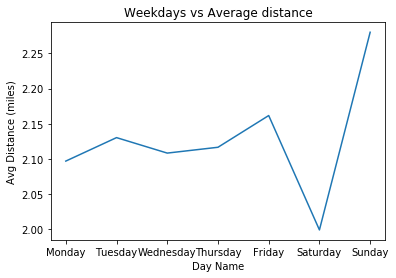

In [32]:
#Do trip distances increase in weekends?

#They do. Especially in Sunday, average trip distance is more than the other days. (Also it may be Saturday night.)

from datetime import datetime
import matplotlib.pylab as plt
from geopy.distance import geodesic
import reverse_geocoder as rg
import csv
import pandas as pd

csv_input = pd.read_csv('taxi-trips.csv')

num_lines = sum(1 for line in open('taxi-trips.csv'))

           
csv_input['distance'] = "0"

for x in range (0, num_lines):

    a = csv_input.iloc[x,5] #long
    b = csv_input.iloc[x,6] #lat
    coord = (b,a)

    c = csv_input.iloc[x,7] #long
    d = csv_input.iloc[x,8] #lat
    coord2 = (d,c)

    csv_input.iloc[x,11] = geodesic(coord, coord2).miles
    
    
dicto = {}
counter = {}


for x in range (0, num_lines): 

    day   = datetime.strptime(csv_input.iloc[x,3], '%Y-%m-%d %H:%M:%S').strftime('%A')
    value = csv_input.iloc[x,11]
    
    
    if  day in dicto:
        dicto[day] = dicto[day] + value
        counter[day] += 1
    else:
        dicto[day] = value
        counter[day] = 1



print(counter)

monavg = dicto['Monday'] / counter['Monday']
tueavg = dicto['Tuesday'] / counter['Tuesday']
wedavg = dicto['Wednesday'] / counter['Wednesday']
thuravg = dicto['Thursday'] / counter['Thursday']
friavg = dicto['Friday'] / counter['Friday']
satavg = dicto['Saturday'] / counter['Saturday']
sunavg = dicto['Sunday'] / counter['Sunday']

    
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    
plt.plot(weekdays, [monavg, tueavg, wedavg, thuravg, friavg, satavg, sunavg]) 

plt.title('Weekdays vs Average distance')
plt.xlabel('Day Name')
plt.ylabel('Avg Distance (miles)')
    
plt.show()  



